# C7 Introduction to Data Visualization with Seaborn

1. Introduction to Seaborn
    - Introduction to Seaborn
    - Using pandas with Seaborn
    - Adding a third variable with hue
2. Visualizing Two Quantitative Variables
    - Introduction to relational plots and subplots
    - Customizing scatter plots
    - Introduction to line plots
3. Visualizing a Categorical and a Quantitative Variable
    - Count plots and bar plots
    - Box plots
    - Point plots
4. Customizing Seaborn Plots
    - Changing plot style and color
    - Adding titles and labels: Part 1
    - Adding titles and labels: Part 2
    - Putting it all together

In [2]:
# Importing the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the course datasets
country_data = pd.read_csv('datasets/countries-of-the-world.csv', decimal=",")
mpg = pd.read_csv('datasets/mpg.csv')
student_data = pd.read_csv('datasets/student-alcohol-consumption.csv', index_col=0)
survey_data = pd.read_csv('datasets/young-people-survey-responses.csv', index_col=0)

# 1. Introduction to Seaborn

## Introduction to Seaborn
- Seaborn is Python data visualization library.
- It easily creates the most common types of plots.
- Advantages: 
    - easy to use
    - works well with pandas data structures.
    - built on top of matplotlib
- Scatter plot:  `import seaborn as sns`\
                 `sns.scatterplot(x=data_x, y=data_y)`
- Count plot: `sns.countplot()` which is a categorical plot.

## Using pandas with Seaborn
- Pandas:
    - Python libary for data analysis.
    - Easily read datasets from many types of files including csv and txt files
    - Supports several types of data structures, but the most common one is the DataFrame object
- Using DataFrames with countplot(): \
    `df = pd.read_csv('path_to_df')`\
    `sns.countplot(x='col_name', data=df)`
- Seaborn works well with 'tidy data':\
  tidy data: each observation has its own row and each variable has its own column

## Adding a third variable with hue (coloring)
- The ability of adding quickly a third variable to plot by adding color.
- `sns.scatterplot(x=datacol_x, y=datacol_y, data=df, hue='third_datacol', hue_order=["Yes", "No"])`
- `hue_colors={"Yes":"black", "No":"red"}` \
  `sns.scatterplot(x=datacol_x, y=datacol_y, data=df, hue='third_datacol', palette=hue_colors)`


Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')


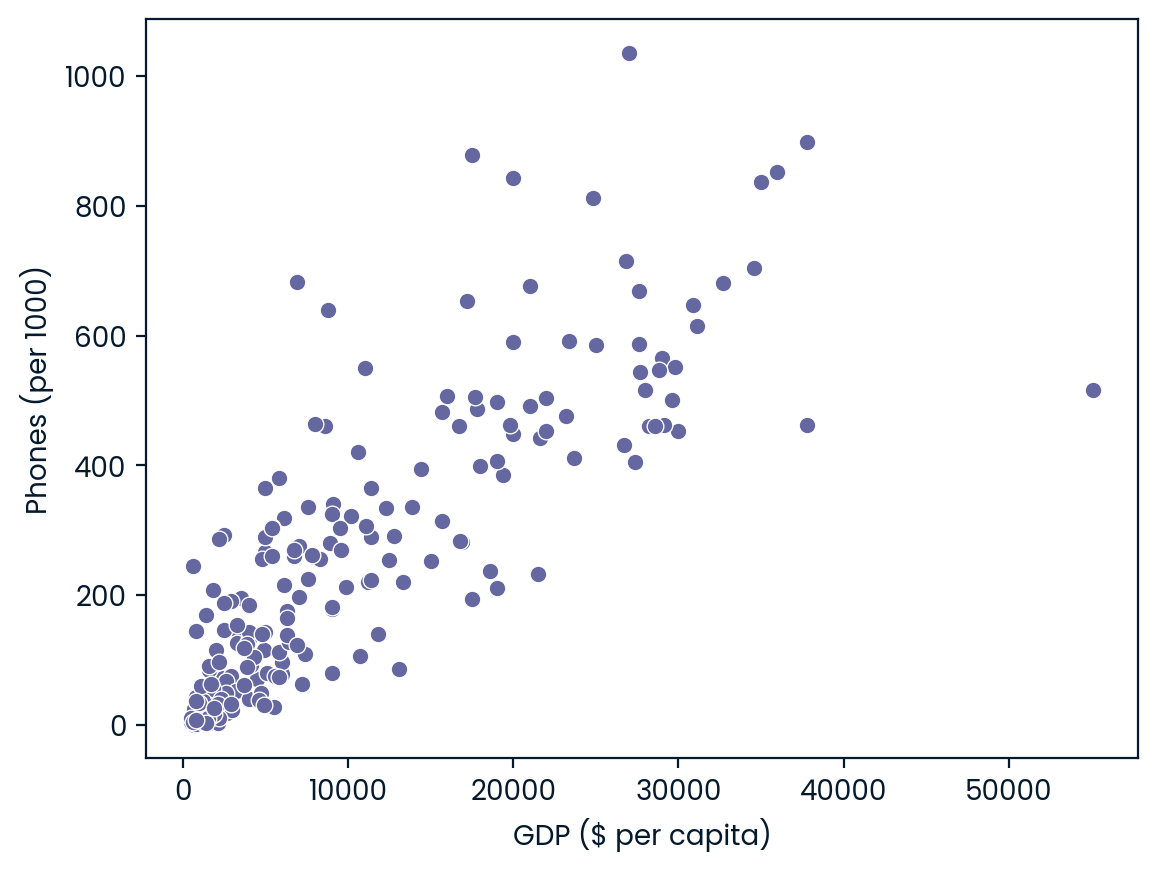

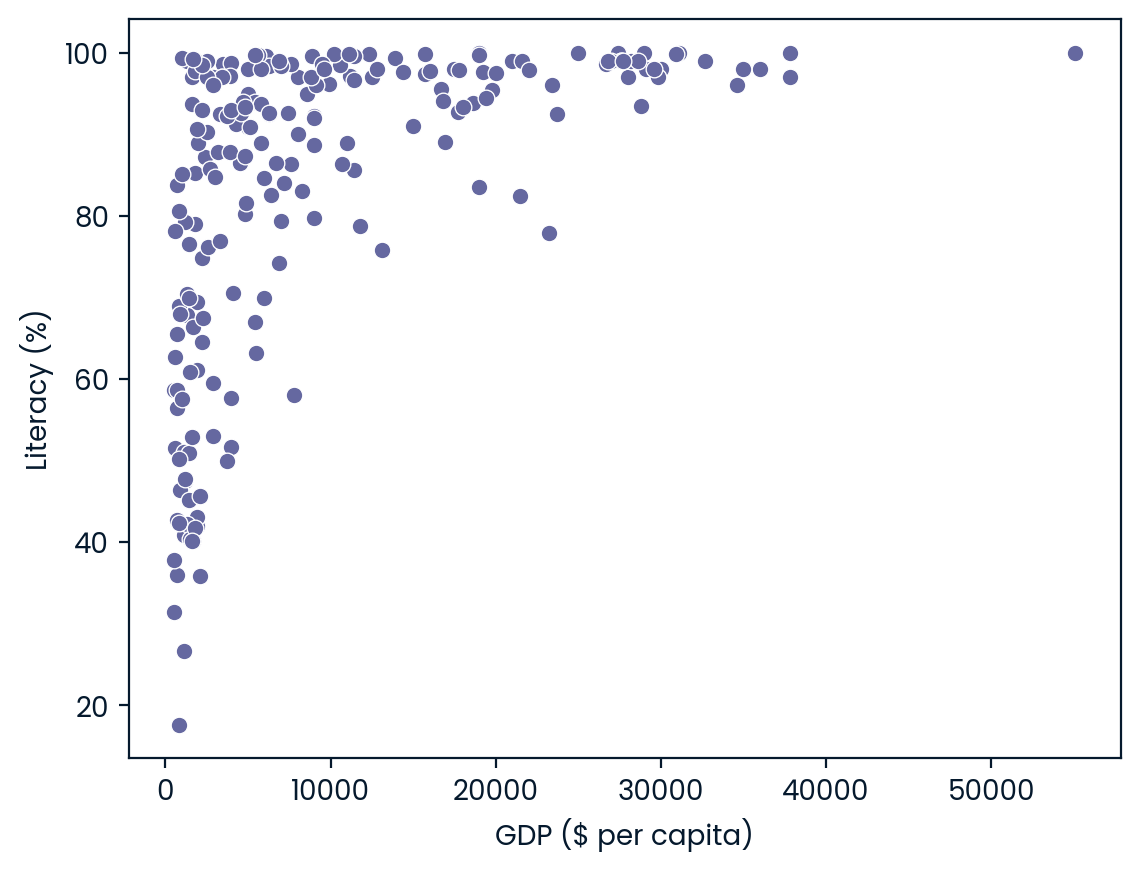

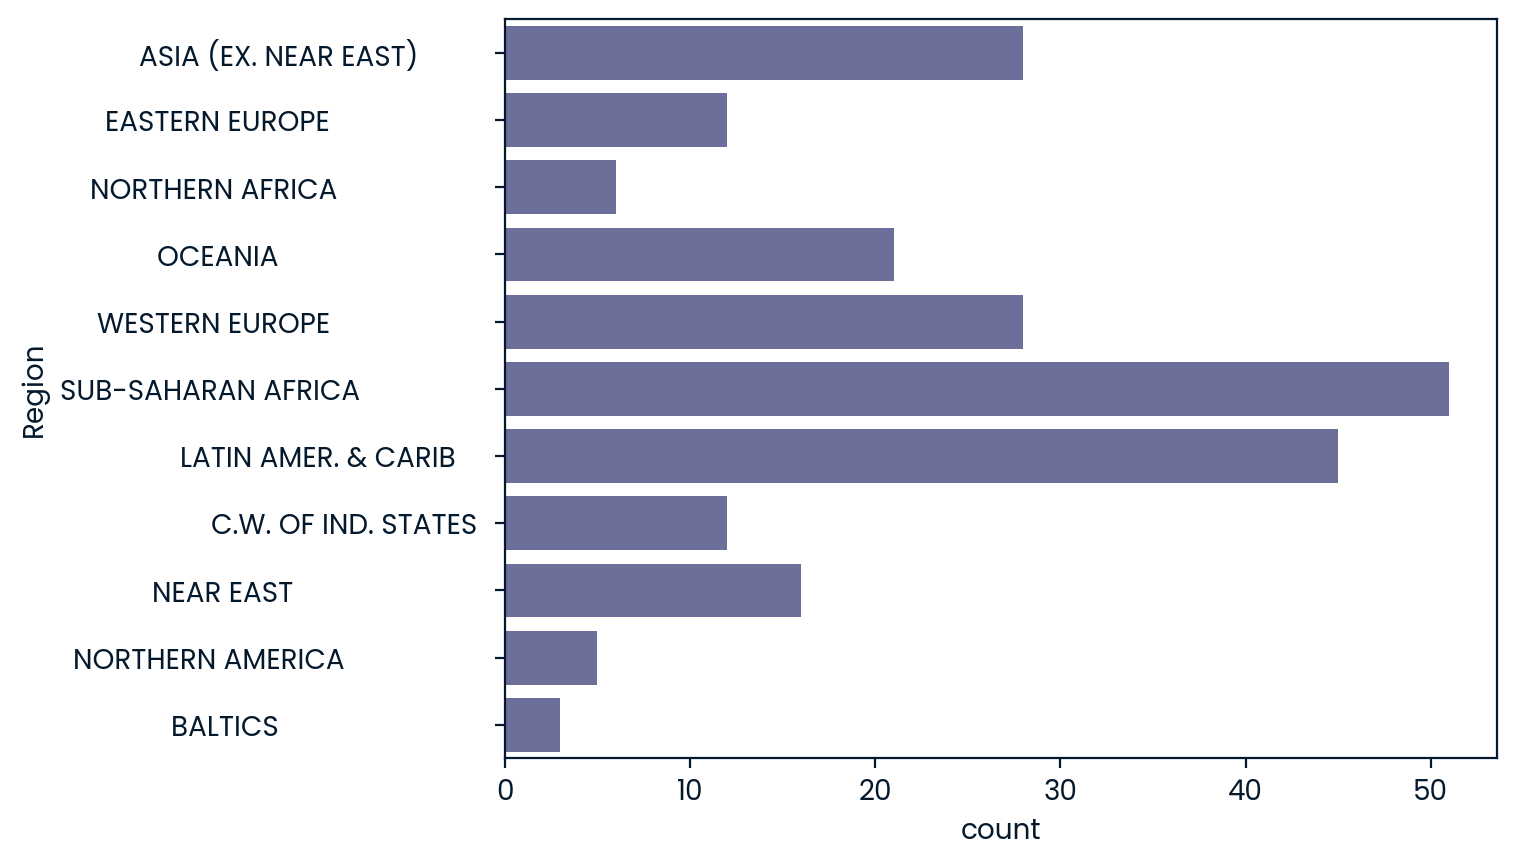

In [23]:
### Introduction to Seaborn ###

#----------------------------------------------
# Making a scatter plot with lists

# Given dataset containing information about 227 countries, 'country_data' DataFrame.
# This dataset has lots of interesting information on each country. 
# Three lists of data are created from this dataset to get you started. 
# gdp: the value of GDP per country, expressed as dollars per person. 
# phones: a list of the number of mobile phones per 1,000 people in that country.
# percent_literate: a list that contains the percent of each country's population that can read and write.

# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Import data (columns) which are needed
#print(country_data.head())
#print(country_data.keys())  # or
print(country_data.columns)  # to check the exact column names
phones = country_data[ 'Phones (per 1000)']
gdp = country_data['GDP ($ per capita)']  # Corrected column name
percent_literate = country_data['Literacy (%)']  # Corrected column name
region = country_data['Region']

#----------------------------------------------
# Create scatter plot with GDP on the x-axis and number of phones on the y-axis
sns.scatterplot(x=gdp, y=phones)
plt.show()

# Change this scatter plot to have percent literate on the y-axis
sns.scatterplot(x=gdp, y=percent_literate)
plt.show()

#----------------------------------------------
# Making a count plot with a list

# Let's do more exploration of this data - specifically, how many countries are in each region of the world?
                
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create count plot with region on the y-axis
sns.countplot(y=region)
plt.show()

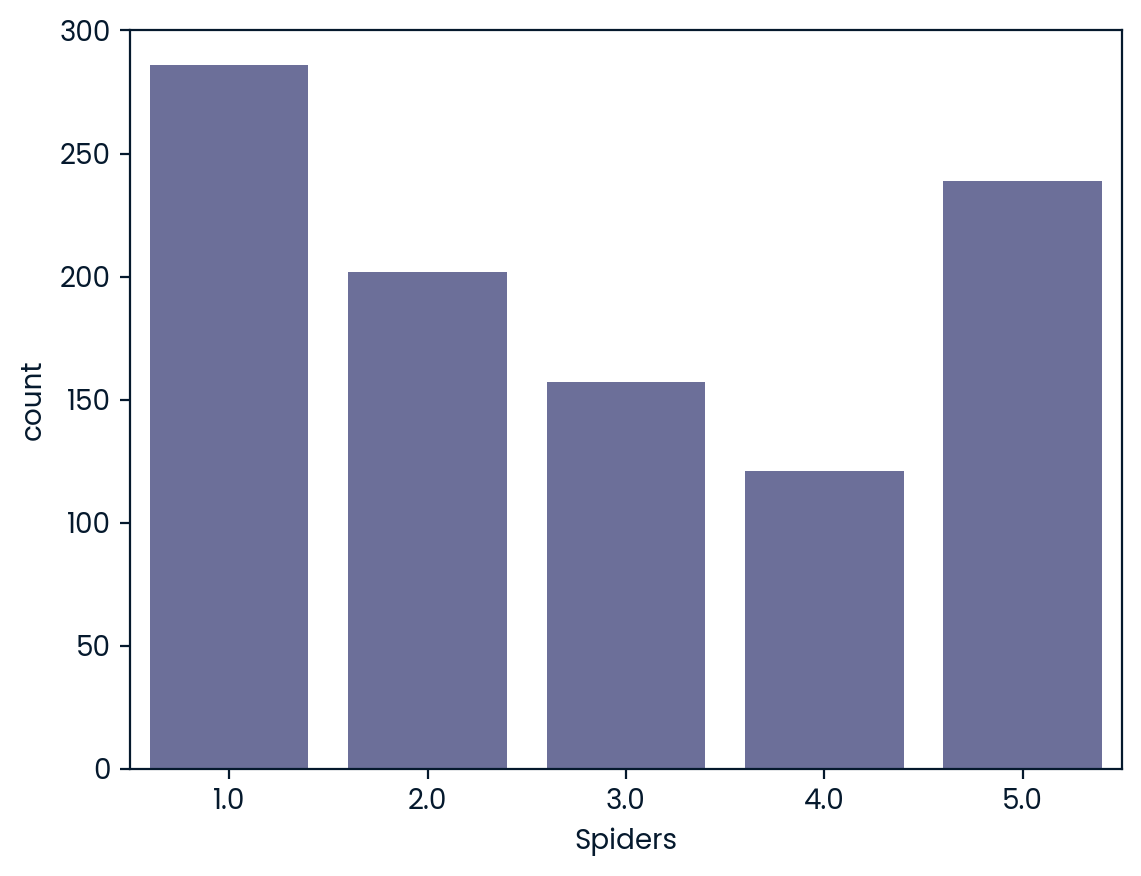

In [1]:
### Using pandas with Seaborn ###

#----------------------------------------------
# Making a count plot with a DataFrame

# Given a DataFrame consisting of responses of young people to a servey.
# Our primary question: how many young people surveyed report being scared of spiders? 
# Responses vary from 1 to 5, where 1 is "Strongly disagree" and 5 is "Strongly agree".

# Import Matplotlib, pandas, and Seaborn
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

# Create a DataFrame from csv file
survey = pd.read_csv('datasets/young-people-survey-responses.csv', index_col=0)

# Create a count plot with "Spiders" on the x-axis
sns.countplot(x='Spiders', data=survey)
plt.show()

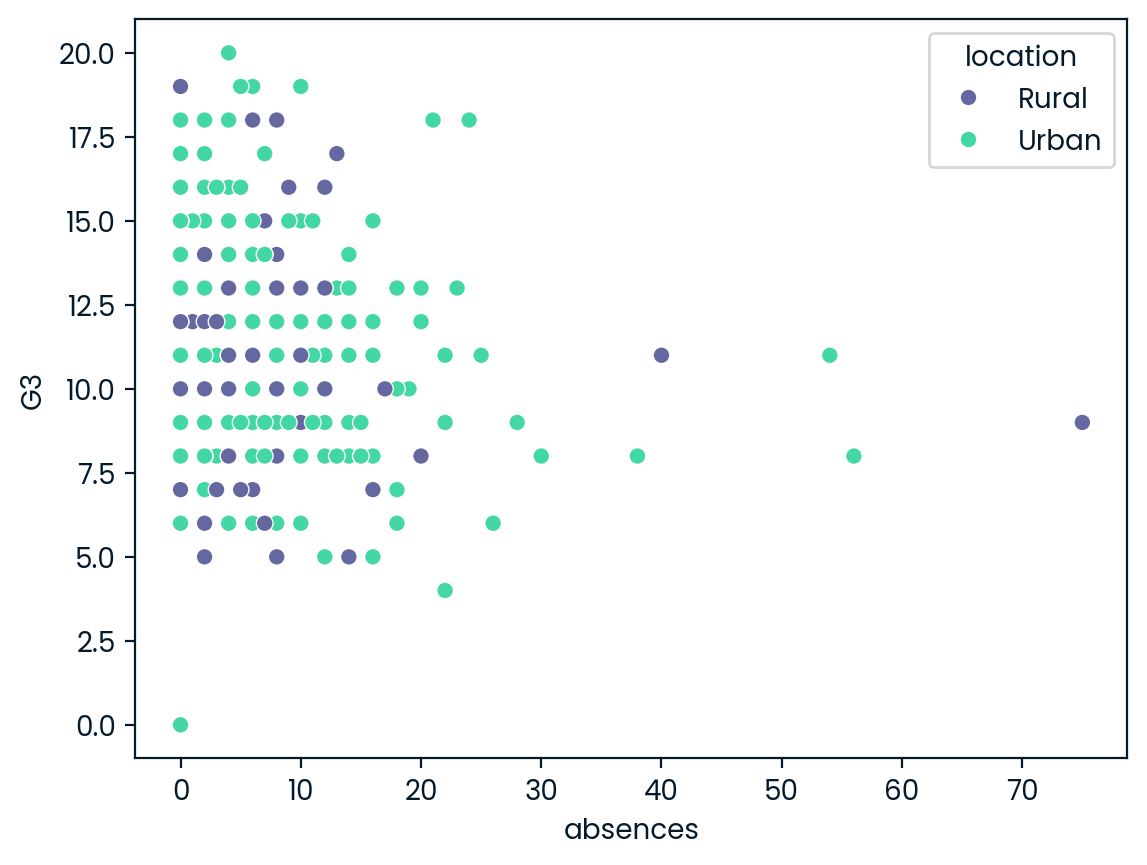

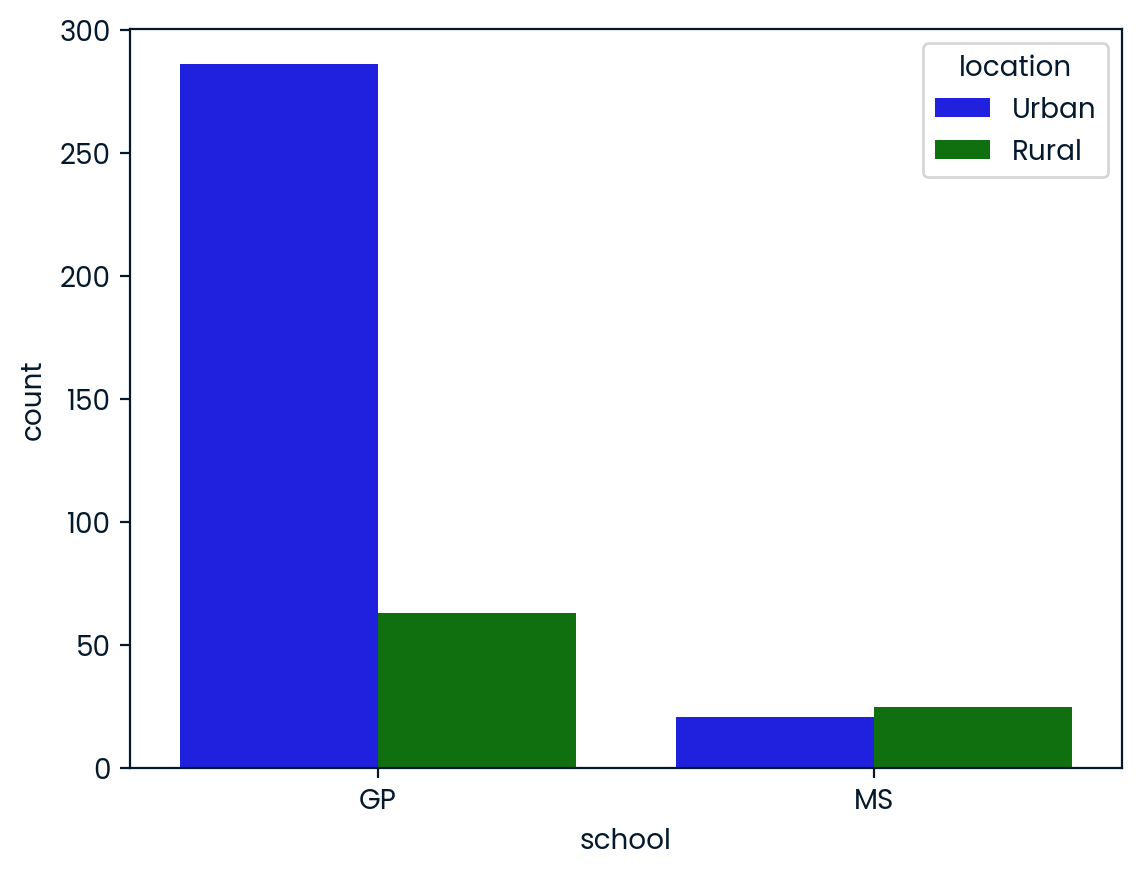

In [5]:
### Adding a third variable with hue (coloring) ###
#----------------------------------------------
# Hue and scatter plots

# Explore data from students in secondary school. It has a lot of information 
# about each student like their age, where they live, their study habits and 
# their extracurricular activities.

# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Change the legend order in the scatter plot
sns.scatterplot(x="absences", y="G3", 
                data=student_data, hue="location", 
                hue_order=["Rural", "Urban"])
plt.show()


#----------------------------------------------
# Hue and count plots

# Explore the dataset from students in secondary school by looking at a new variable. 
# The "school" column indicates the initials of which school the student attended - either "GP" or "MS".

# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary mapping subgroup values to colors
palette_colors = {"Rural": "green", "Urban": "blue"}

# Create a count plot of school with location subgroups
sns.countplot(x="school", data=student_data, hue="location", palette=palette_colors)

# Display plot
plt.show()


# 2. Visualizing Two Quantitative Variables

## Introduction to relational plots and subplots
- Relational plots: describes the relationship between two quantitative variables. 
    - Scatter plots are used.
    - Possible to have different relations in subgroups, use `hue` parameter for this purpose. (See the previous chapter.)
- Creating a separate plot per subgroup:
    - `relplot()` stands for relational plot. (scatter plot or line plot to be chosen)
    - `relplot()` plots relational figures in a single figure.
    - using scatterplot: `sns.scatterplot(x=datacol_x, y=datacol_y, data=df)`
    - using relplot: `sns.relplot(x=datacol_x, y=datacol_y, data=df, kind="scatter", col=col_to_subgroup)`
    - `sns.relplot(...., col=col_to_subgroup)`: gives separate horizontal scatter plots for the chosen subgroup.\
      `sns.relplot(...., row=col_to_subgroup)`: plots are vertivally orriented instead.\
       Possible to use both `col`and `row`parameters at the same time.\
       `sns.relplot(...., col_wrap=2)`: 2 subplots per row (think of a (2,2) plot)\
       `sns.relplot(...., col_order=[....])` : enter the order

## Customizing scatter plots
- `relplot`: subplots (`col` and `row`)
- `scatterplot`: subgroups with color (`hue`)
- New customizations:
    - subgroups with point size and style
    - changing point transparency 
    - All these options can be used for both `scatterplot` and `relplot`, \
      but we will use `relplot` for the rest of the course. 
- size: `sns.relplot(....., kind="scatter", size="size")` ,hard to read because of coloring\
    additionaly use hue parameter: gives different colors for categorical variables\
    `sns.relplot(.....,  kind="scatter", size="size", hue="size")`
- point style: set `style` parameter to a variable name for different styles.
- transparency: `alpha`parameter, between 0 and 1.

## Introduction to line plots
- The kind of `relplot`: `scatter`and `line`
- Scatter plot: each plot point is an independent observation
- Line plot: each plot point represents the same type of observation over time.
- Line plots:
    - `sns.relplot(.....,  kind="line", style="location", hue="location")` subgroups by location
    - `sns.relplot(....., markers=True)` adding markers for each data point.
    - `sns.relplot(....., dashes=False)` turning of line style which varies by subgroup
- multiple observations per x value:
    - scatter plot: displays each observation points per x values
    - line plot: aggregate multiple observations per x values into a single summary measure: mean. It also shows confidence interval.
- Confidence interval:
    - Assumes dataset is a random sample.
    - $95%$ confident that the mean is withing this interval.
    - Indicates uncertanity in our estimate.
    - Replacing confidence interval with standard deviation:\
      `sns.relplot(...., ci="sd")`, the shaded areca displays the std.
    - Turning of the confidence interval: \
      `sns.relplot(....., ci=None)`



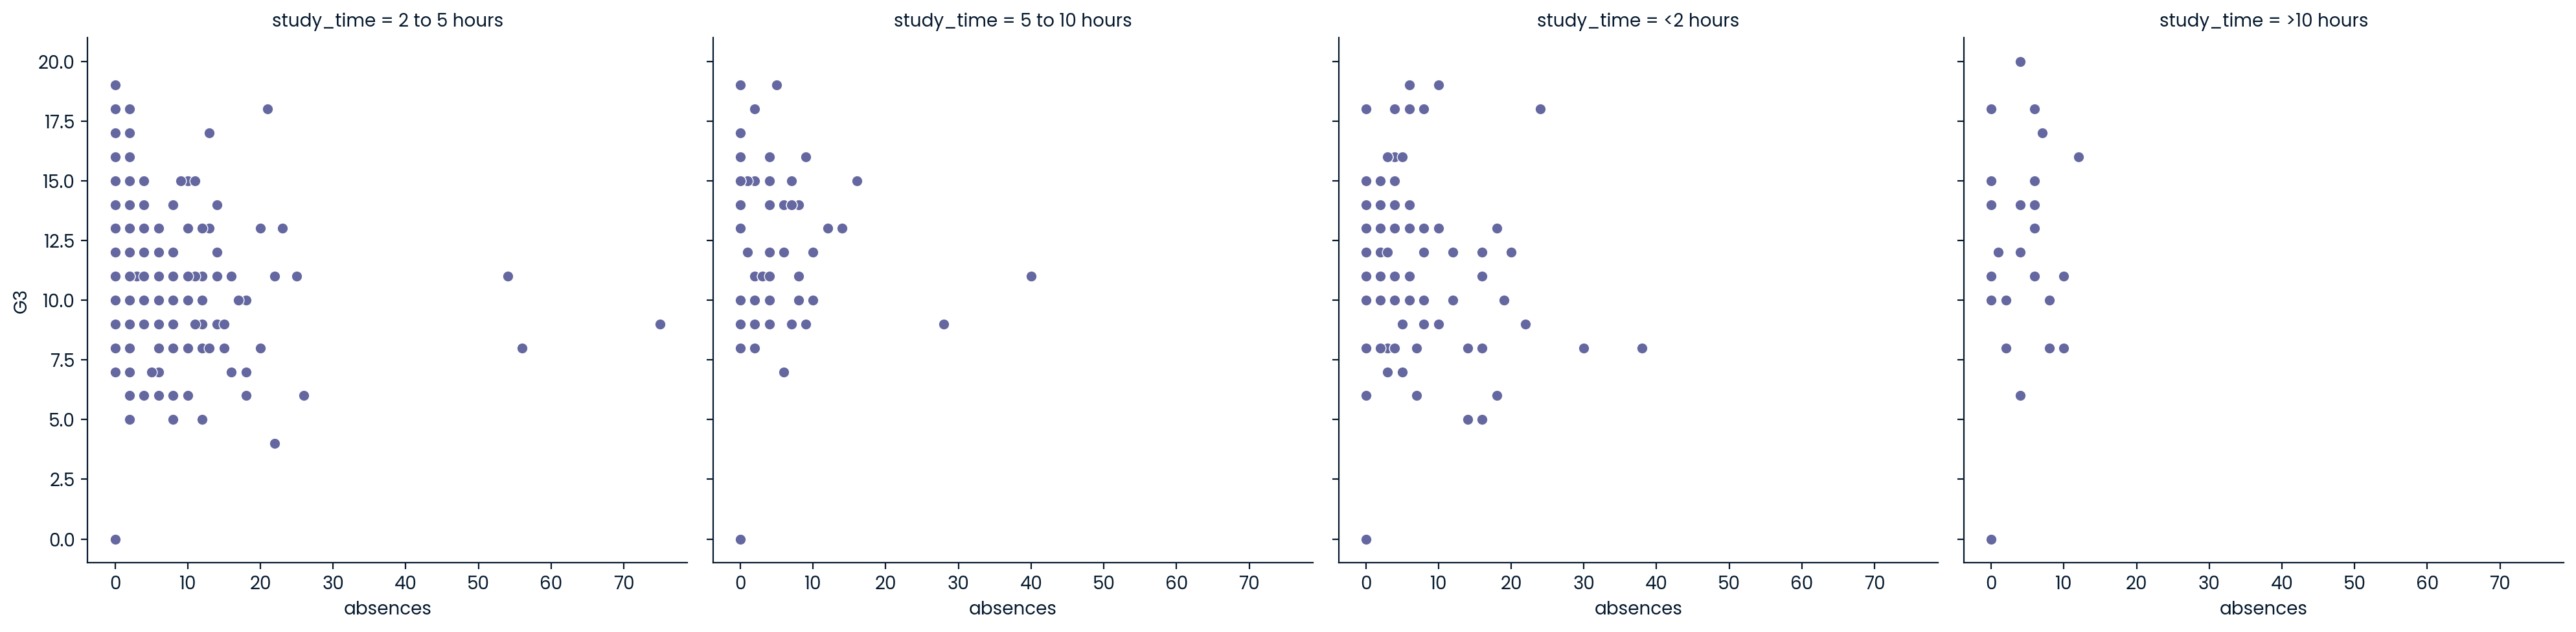

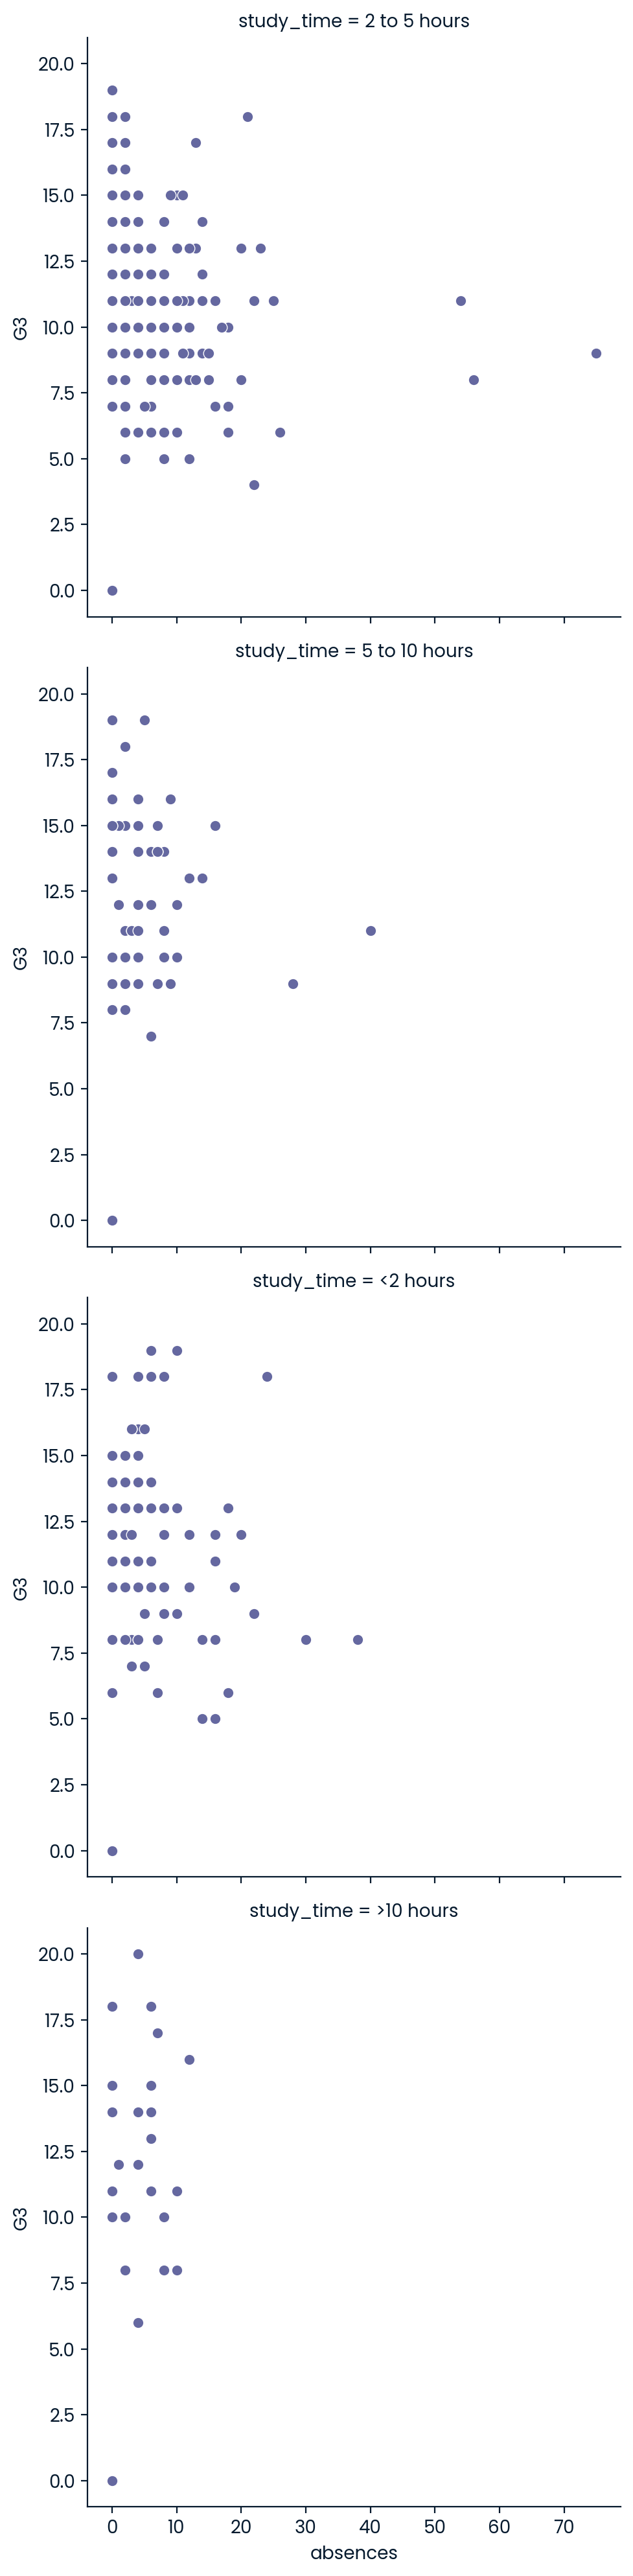

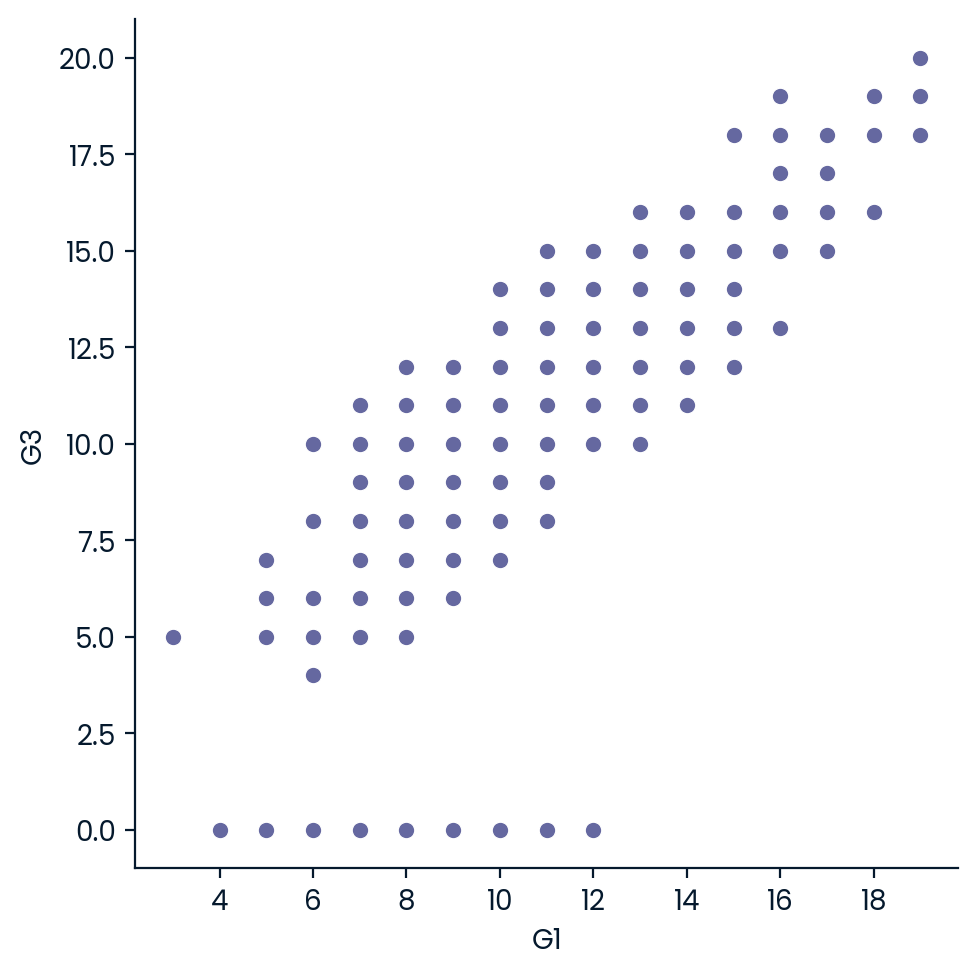

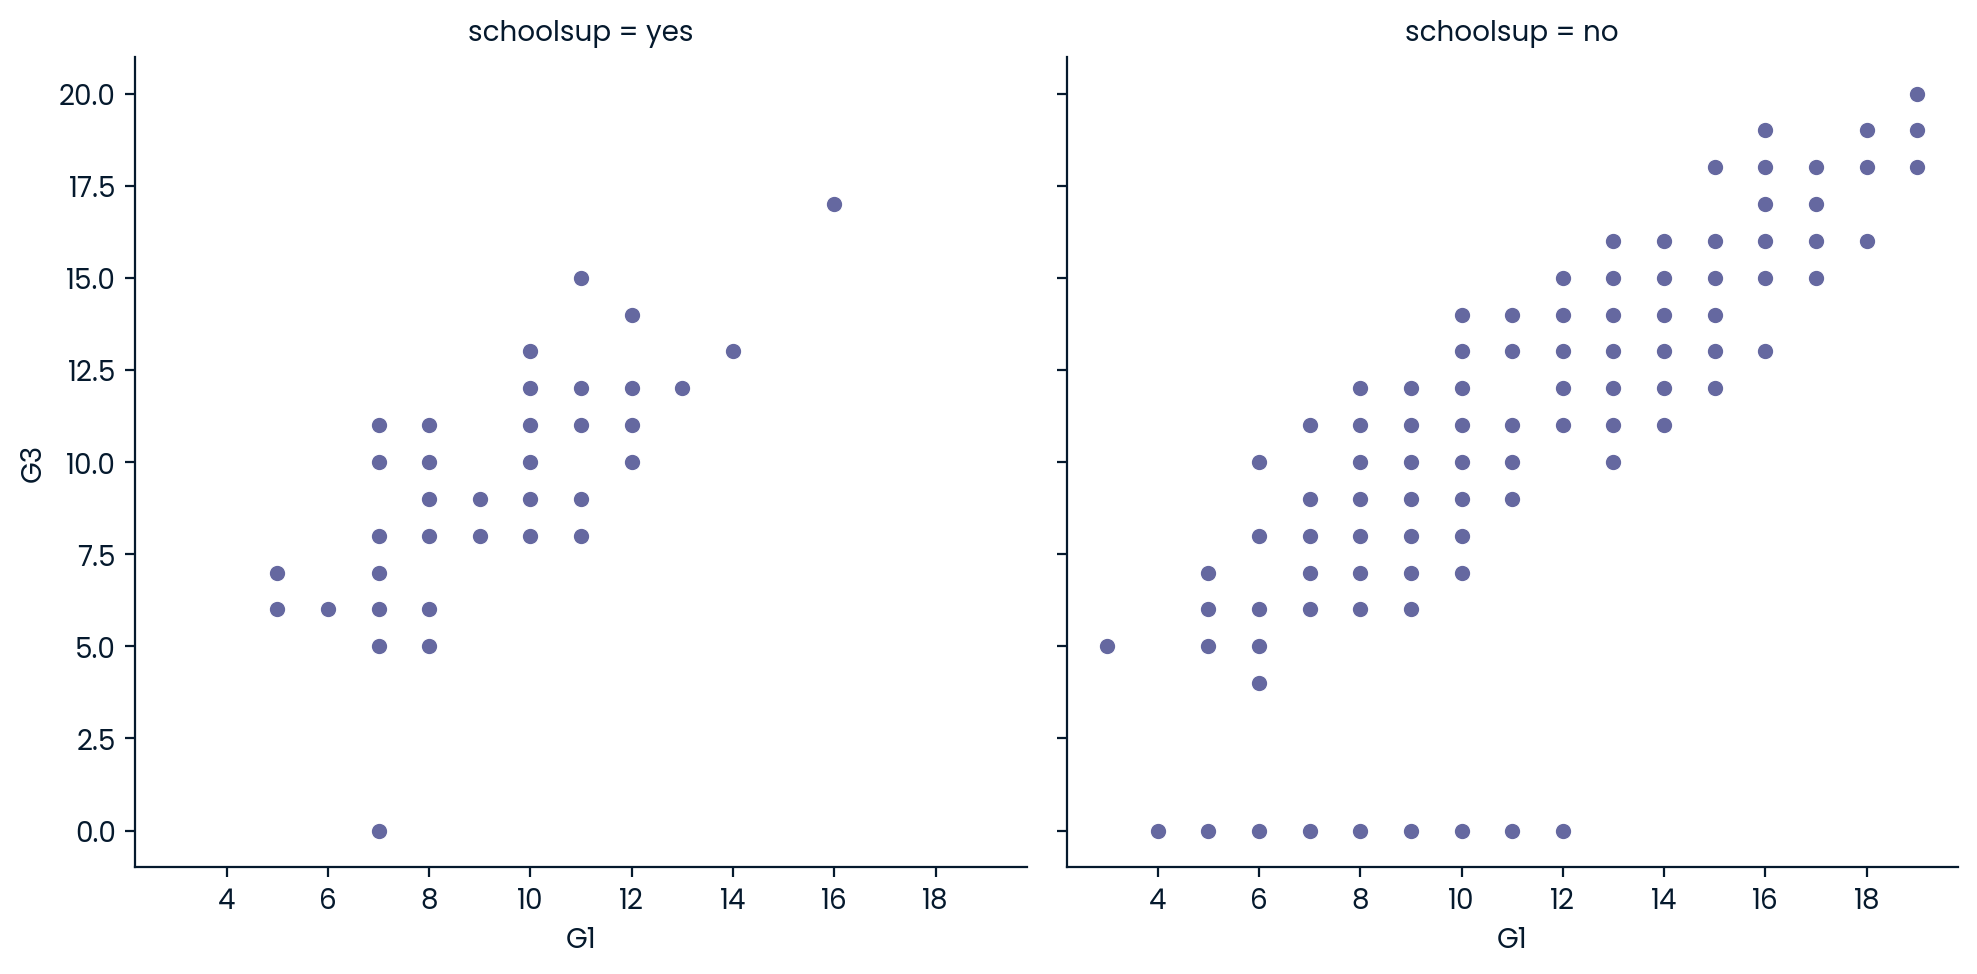

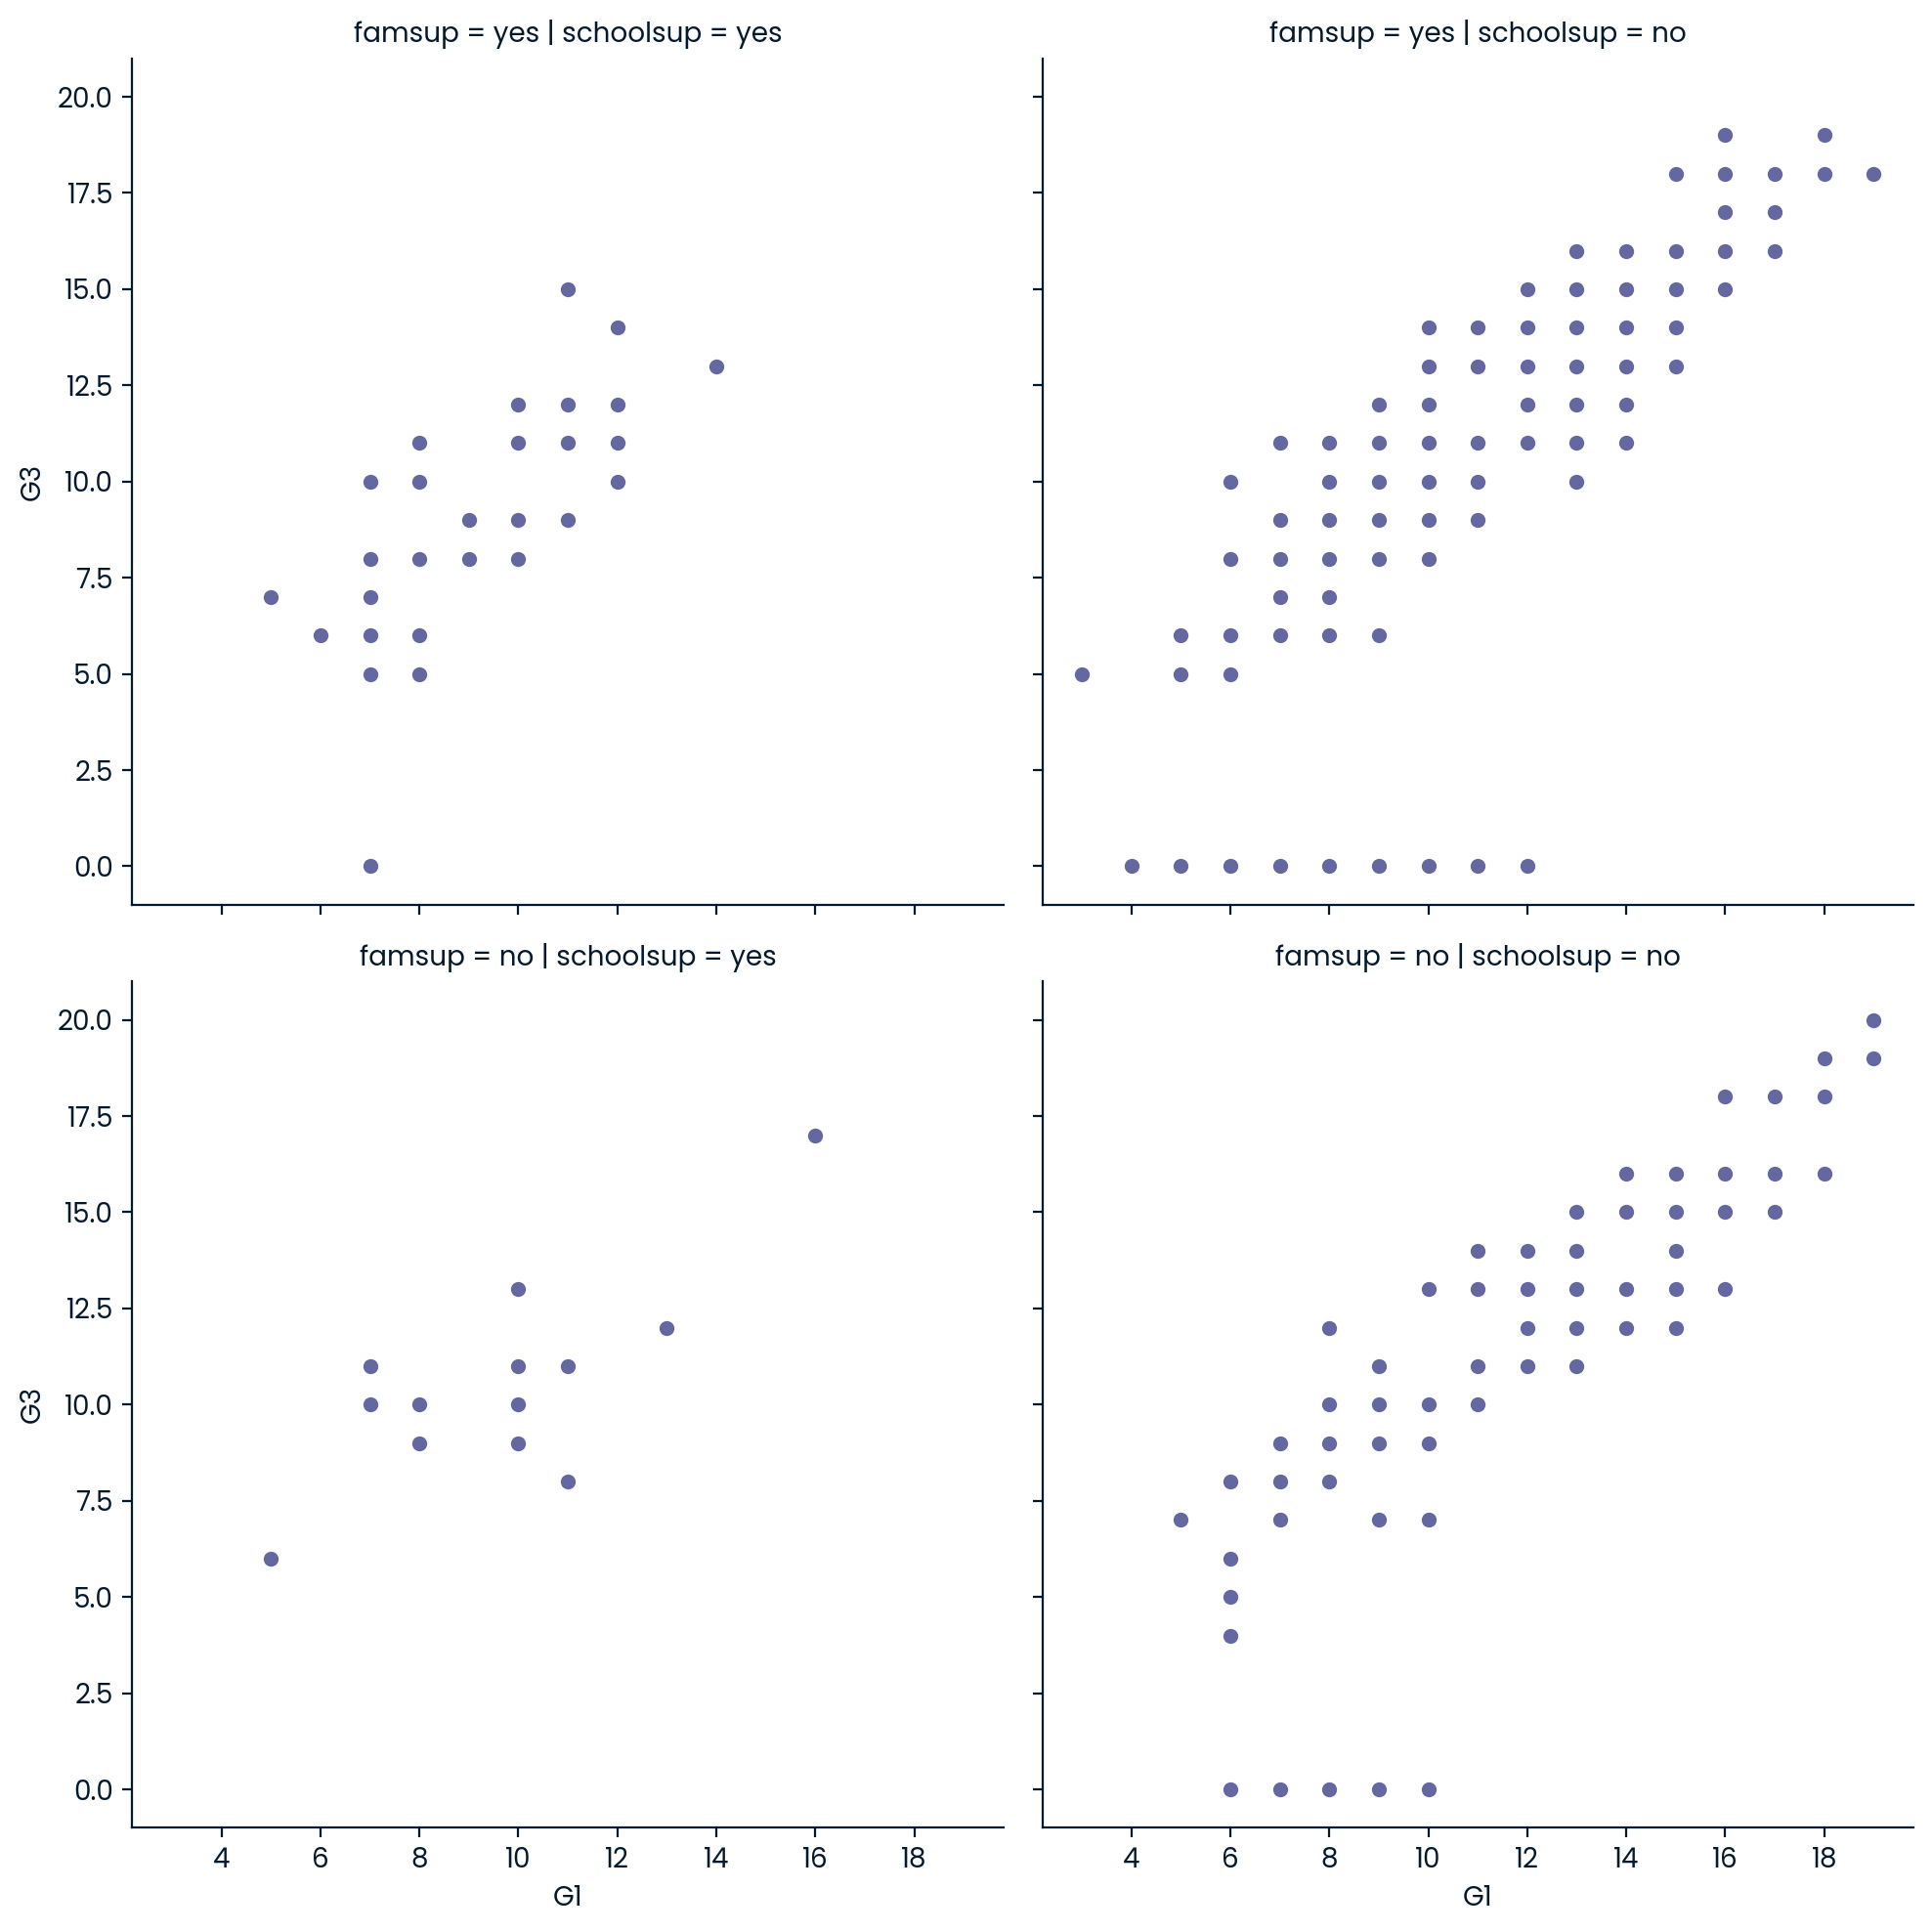

In [3]:
### Introduction to relational plots and subplots ###

#----------------------------------------------
# Creating subplots with col and row

# In prior exercises,students with more absences tend to have lower final grades. 
# Does this relationship hold regardless of how much time students study each week?

# Change to make subplots based on study time
sns.relplot(x="absences", y="G3", 
            data=student_data, col='study_time',
            kind="scatter")
plt.show()

# Change this scatter plot to arrange the plots in rows instead of columns
sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind="scatter", 
            row="study_time")
plt.show()


#----------------------------------------------
# Creating two-factor subplots

# Does a student's first semester grade ("G1") tend to correlate with their final grade ("G3")?

# Some students receive extra educational support from their school ("schoolsup") or 
# from their family ("famsup"), which could result in higher grades. 

# Create a scatter plot of G1 vs. G3
sns.relplot(x="G1", y="G3", data=student_data, kind="scatter")
plt.show()

# Adjust to add subplots based on school support
sns.relplot(x="G1", y="G3", data=student_data,
            kind="scatter", col="schoolsup", col_order=["yes", "no"])
plt.show()

# Adjust further to add subplots based on family support
sns.relplot(x="G1", y="G3", data=student_data,
            kind="scatter", col="schoolsup", row="famsup",
            col_order=["yes", "no"], row_order=["yes", "no"])
plt.show()

# CCOMMENT: The first semester grade does correlate with the final grade, 
# regardless of what kind of support the student received.

In [ ]:
### Customizing scatter plots ###

#----------------------------------------------
# Changing the size of scatter plot points

# Given Seaborn's mpg dataset, which contains one row per car model and 
# includes information such as the production year, the number of miles per gallon ("M.P.G.")...
# What is the relationship between the power of a car's engine ("horsepower") and its fuel efficiency ("mpg")? 
# And how does this relationship vary by the number of cylinders ("cylinders") the car has? 

print(mpg.head())

# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot of "horsepower" on the x-axis vs. "mpg" on the y-axis.
# Vary the size of the points by the number of cylinders in the car ("cylinders").
sns.relplot(x="horsepower", y="mpg", data=mpg, kind="scatter", size="cylinders", hue="cylinders")
plt.show()


#----------------------------------------------
# Changing the style of scatter plot points

# Explore the relationship between "acceleration" and its fuel efficiency ("mpg"). 
# Do these properties vary by country of origin ("origin")?
# The "acceleration" variable is the time to accelerate from 0 to 60 miles per hour, in seconds. 

# Create a scatter plot of acceleration vs. mpg
# Vary the style and color of the plot points by country of origin ("origin").
sns.relplot(x="acceleration", y="mpg", data=mpg, kind="scatter",
            style="origin", hue="origin")
plt.show()

# Comment: Cars from the USA tend to accelerate more quickly and 
# get lower miles per gallon compared to cars from Europe and Japan.


In [ ]:
### Introduction to line plots ###

#----------------------------------------------
# Interpreting line plots

# How has the average miles per gallon achieved by these cars changed over time?

# Create line plot  with "model_year" on the x-axis and "mpg" on the y-axis.
sns.relplot(x="model_year", y="mpg", data=mpg, kind="line")
plt.show()

# Comment:  The shaded region represents a confidence interval for the mean.

#----------------------------------------------
# Visualizing standard deviation with line plots

# Make the shaded area show the standard deviation
sns.relplot(x="model_year", y="mpg",
            data=mpg, kind="line", ci="sd")
plt.show()

# Unlike the plot in the last exercise, this plot shows us the distribution 
# of miles per gallon for all the cars in each year.

#----------------------------------------------
# Plotting subgroups in line plots

# How has the average horsepower for cars changed over time? 
# And does this trend differ by country of origin?

# Add markers and make each line have the same style
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None, style="origin", 
            hue="origin", markers=True, dashes=False)
plt.show()

# See that this downward trend in horsepower was more pronounced among cars from the USA.


# 3. Visualizing a Categorical and a Quantitative Variable

## Count plots and bar plots
- Visualizations for categorical variables (categorical plots): count plots and bar plots
    - used for comparisons between groups
    - involve categorical variables
- `catplot()`: 
    - used for categorical plots
    - same advantages as `relplot()`
    - create subplots using `col=` and `row=`
    - `sns.countplot(x='data_col', data=df)`=\
      `sns.catplot(x='data_col', data=df, kind="count")`
    - categorical order: `order=[...]`
- `barplot()`: 
    - shows the mean of a quantitative variable among observations in each category\
      instead of the count of observations in each category.
    - `sns.catplot(x='data_col', y='data_col', data=df, kind="bar")`
    - shows confidence intervals as line plots
        - lines shows $95%$ confidence intervals for the mean
        - assumed that the data is a random sample
        - `ci=None` turns of the confidence interval.

## Box plots
- A box plot shows the distribution of quantitative data. 
- It is used to compare the distribution of a quantitative variable across different groups of a categorical variable.
- The colored box: the 25th to 75th percentile, \
  the line in the middle of the box: the median, \
  the whiskers: the spread of the distribution,\
  the floating points: outliers. 
- `sns.catplot(x='data_col', y='data_col', data=df, kind="box")`
- `order=[... ]` to set the order
- `sym=""`: to omit outliers
- `whis=[5, 95]` to set whiskers to the 5th and 95thpercentiles or 
- `whis=[0, 100]` to set min and max values

## Point plots
- Show the mean of a quantitative variable for the observations in each category.
- Vertical line shows the confidence interval
- Point plot vs line plot:
    - Both show:
        - mean of quantitative variable
        - the confidence interval
    - Differences: 
        - Line plot has **quantitative** variable (usually time) on x-axis.
        - Point plot has **categorical** variable on x-axis.
- Point plot vs. bar plot: 
    - Have the common points as above.
    - It is easier to compare the heights of subgroups and look at the slope between categories in a poin plot.
- `sns.catplot(x="cata_col", y="data_col", data=df, kind="point",....)`
- `join=False` to remove the lines connection each mean of quantitative variables
- `estimator=np.median` to display the median instead of the mean. \
   Median is more robust to outliers, in the case of more outliers median can give better statistics.
- `capsize=0.2` to add caps at the end of the confidence interval with size=0.2
- again `ci=None` parameter to turn of the confidence interval

In [ ]:
### Count plots and bar plots ###

#----------------------------------------------
# Count plots

# Given dataset that contains the responses fo young people to a survey.
# We might suspect that young people spend a lot of time on the internet, 
# but how much do they report using the internet each day?

print(survey_data.head())
print(survey_data.columns)

# Create count plot of internet usage
sns.catplot(x="Internet usage", data=survey_data, kind="count")
plt.show()

# Change the orientation of the plot
sns.catplot(y="Internet usage", data=survey_data, kind="count")
plt.show()

# Separate into column subplots based on age category
sns.catplot(y="Internet usage", data=survey_data,
            kind="count", col="Age Category")
plt.show()

#----------------------------------------------
# Bar plots with percentages

# What percentage of young people report being interested in math, and does this vary based on gender? 

# Create a bar plot of interest in math, separated by gender
sns.catplot(x="Gender", y="Interested in Math", data=survey_data, kind="bar")
plt.show()


#----------------------------------------------
# Customizing bar plots

# Given a DataFrame "student_data", data from students in secondary school. 
# The "study_time" variable, weekly study time: "<2 hours", "2 to 5 hours", "5 to 10 hours", or ">10 hours". 
# Does higher amounts of studying tend to get better final grades? 

print(student_data.head())
print(student_data.columns)

# List of categories from lowest to highest
category_order = ["<2 hours", 
                  "2 to 5 hours", 
                  "5 to 10 hours", 
                  ">10 hours"]

# Create bar plot of average final grade in each study category
sns.catplot(x="study_time", y="G3",
            data=student_data,
            kind="bar", order=category_order) 
# add ci=None to turn off the confidence interval

# Show plot
plt.show()


In [ ]:
### Box plots ###

#----------------------------------------------
# Create and interpret a box plot

# Explore the relationship between studying and final grade by using a bar plot 
# to compare the average final grade ("G3") among students in different categories of "study_time".

# Specify the category ordering
study_time_order = ["<2 hours", "2 to 5 hours", 
                    "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
sns.catplot(x="study_time", y="G3",  data=student_data, kind="box", order=study_time_order)
plt.show()

#----------------------------------------------
# Omitting outliers

# Compare the distribution of final grades ("G3") between students 
# who have internet access at home and those who don't. 
# As internet may be less accessible in rural areas, add subgroups based on "location".

# Create a box plot with subgroups and omit the outliers
# Add subgroups so each box plot is colored based on "location".
sns.catplot(x="internet", y="G3", data=student_data, kind="box", sym="", hue="location")
plt.show()


#----------------------------------------------
# Adjusting the whiskers

# Compare the distribution of "G3" between students
# who are in a romantic relationship and those that are not. 

# Set the whiskers to 0.5 * IQR
sns.catplot(x="romantic", y="G3", data=student_data, kind="box", whis=0.5)
plt.show()

# Extend the whiskers to the 5th and 95th percentile
sns.catplot(x="romantic", y="G3", data=student_data, kind="box", whis=[5,95])
plt.show()

# Set the whiskers at the min and max values
sns.catplot(x="romantic", y="G3", data=student_data, kind="box", whis=[0,100])
plt.show()


In [ ]:
### Point plots ###

#----------------------------------------------
# Customizing point plots

# Does the quality of the student's family relationship influence 
# he number of absences the student has in school? Use the "famrel" variable
# describing the quality of a student's family relationship from 1 (very bad) to 5 (very good).

# Create a point plot of family relationship vs. absences
sns.catplot(x="famrel", y="absences", data=student_data,
            kind="point", capsize=0.2)
# join=False: Remove the lines joining the points
plt.show()


#----------------------------------------------
# Point plots with subgroups

# Is being in a romantic relationship associated with higher or lower school attendance? 
# And does this association differ by which school the students attend?

# Create a point plot that uses color to create subgroups
sns.catplot(x="romantic", y="absences", data=student_data, kind="point", hue="school")
#  ci=None: no confidence interval
# estimator=median : the median number of absences instead of the mean
plt.show()

# 4. Customizing Seaborn Plots

## Changing plot style and color
- Seaborn has five preset figure styles:
    - They change the background and axes of the plot. 
    - by name: "white", "dark", "whitegrid", "darkgrid", and "ticks". 
    - use `sns.set_style()` to set one of these
- Changing the palette:
    - 'palette' changes the color of the figure elements of the plot
    - `sns.set_palette()`
    - diverging palettes: use if the figure scale has two opposite ends and a neutral midpoint. 
    - sequential palettes: great to emphasize a variable on a continuous scale.
    - possible to pass own choosen custom color
- Changing the scale: 
    - 'context' changes the scale of plot elements and labels
    - `sns.set_context()`
    -  smallest to largest are "paper", "notebook", "talk", and "poster".

## Adding titles and labels: Part 1 and Part 2
- First understand the underlying mechanism in Seaborn.
-  Seaborn's plot functions create two different types of objects: FacetGrids and AxesSubplots. 
    - to understand the type: `g=sns.scatterplot(...)`, `type(g)`
    - A FacetGrid consists of one or more AxesSubplots, which is how it supports subplots.
    - **FacetGrid** objects: support`relplot()`, `catplot()`: can create subplots
    - **AxesSubplots*** objects: support `scatterplot()`, `countplot()`: only creates single plots
    - The method for adding a title to a plot will differ depending on the type of object it is.
- Adding a title ot **FacetGrid**:
    - `g=sns.catplot(....)`\
      `g.fig.suptitle("...", y=1.03)`\
      use `y` parameter to set the height of the title, default is 1.
    - `g.set_titles("This is {col_name}")`: to set titles to subplots
    - `g.set(xlabel="...", ylabel="...")`: to set axes labels. 
- Adding a title ot **AxesSubplot**:
    - `g=sns.boxplot(....)`\
      `g.set_title("...", y=1.03)`\
    - `g.set_titles()`is used to set titles to AxesSubplots of FacetGrid object.
    - `g.set(xlabel="...", ylabel="...")`: to set axes labels,  the same.
- Rotating x-axis tick labels: 
    - To do this, we don't call a function on the plot object itself. 
    - Instead, after we create the plot, we call the matplotlib function \
      `plt.xticks(rotation=90)`
    - Works for both FacetGrid and AxesSubplot objects.

## Putting it all together
- Relational plots:
    - show the relationship between two quantitative variables.
    - examples: scatter plots, line plots
    - `import seaborn as sns`\
      `sns.relplot(x=col_name, y=col_name, data=df, kind='scatter'/'line')` 
- Categorical plots:
    - show the distribution of a quantitative variable within categories given by a categorical variable.
    - examples : bar plots, count plots, box plots, and point plots.
    - `sns.catplot(x=col_name, y=col_name, data=df, kind='bar')`
- Adding a third variable 
    - `hue` : Setting the `hue` will create subgroups that are displayed as different colors on a single plot.
    - `row`/`col`: Setting `row` and/or `col` in `relplot` or `catplot` will create subgroups that are displayed on separate subplots.
- Customization:
    - change the background of the plot: `sns.set_style()`
    - the color of the main elements using `sns.set_palette()`
    - the scale of the plot using `sns.set_context(9`
- Adding a title: check above...


In [ ]:
### Changing plot style and color ###

#---------------------------------------------------
# Changing style and palette

# Given a dataset containing the results of a survey given to young people
# about their habits and preferences. 
# "How often do you listen to your parents' advice?".

# Change the color palette to "RdBu"
sns.set_style("whitegrid")
sns.set_palette("RdBu")

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes", 
                  "Often", "Always"]

sns.catplot(x="Parents Advice", data=survey_data, 
            kind="count", order=category_order)
plt.show()

#---------------------------------------------------
# Changing the scale

# Does the percentage of people reporting that they feel lonely 
# vary depending on how many siblings they have?

# Change the context to "paper", "notebook", "talk" or "poster"
sns.set_context("poster")

# Create bar plot
sns.catplot(x="Number of Siblings", y="Feels Lonely",
            data=survey_data, kind="bar")
plt.show()

#---------------------------------------------------
# Using a custom palette

# Look at the type of people answering this survey, including their age and gender.

# Set the style to "darkgrid"
sns.set_style("darkgrid")
# Set a custom color palette
sns.set_palette(["#39A7D0","#36ADA4"])

# Create the box plot of age distribution by gender
sns.catplot(x="Gender", y="Age", data=survey_data, kind="box")
plt.show()
 

In [ ]:
### Adding titles and labels: Part 1 and Part 2 ###

#---------------------------------------------------
# Adding a title to a FacetGrid object

# We have create a scatter plot showing the relationship between a car's weight and its horsepower. 
# This created a FacetGrid object. Now that we know what type of object it is, let's add a title to this plot.

# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")
print(type(g))

# Add a title "Car Weight vs. Horsepower"
g.fig.suptitle("Car Weight vs. Horsepower")
plt.show()

#---------------------------------------------------
# Adding a title and axis labels

# Create a line plot to answer the question: How does the average miles per gallon 
# achieved by cars change over time for each of the three places of origin? 

# Create line plot
g = sns.lineplot(x="model_year", y="mpg_mean", 
                 data=mpg_mean, hue="origin")

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time")
# Add x-axis and y-axis labels
g.set(xlabel="Car Model Year", ylabel="Average MPG")
plt.show()

#---------------------------------------------------
# Rotating x-tick labels

# Create a point plot that displays the average acceleration for cars 
# in each of the three places of origin. 

# Create point plot
sns.catplot(x="origin", y="acceleration",  data=mpg, 
            kind="point", join=False, capsize=0.1)
# Rotate x-tick labels
plt.xticks(rotation=90)
plt.show()

In [ ]:
### Putting it all together ###

#---------------------------------------------------
# Box plot with subgroups

# Given a dataset containing responses from a survey given to young people. 
# One of the questions was: "Are you interested in having pets?" 
# Explore the distribution of ages with respect to gender. 

# Set palette to "Blues"
sns.set_palette("Blues")

# Adjust to add subgroups based on "Interested in Pets"
g = sns.catplot(x="Gender", y="Age", data=survey_data, 
                kind="box", hue="Interested in Pets")

# Set title to "Age of Those Interested in Pets vs. Not"
g.fig.suptitle("Age of Those Interested in Pets vs. Not")
plt.show()

#---------------------------------------------------
# Bar plot with subgroups and subplots

# Investigate whether the proportion of people who like techno music ("Likes Techno") 
# varies by their gender ("Gender") or where they live ("Village - town"). 

# Set the figure style to "dark"
sns.set_style("dark")

# Adjust to add subplots per gender
g = sns.catplot(x="Village - town", y="Likes Techno", 
                data=survey_data, kind="bar", col="Gender")

# Add title and axis labels
g.fig.suptitle("Percentage of Young People Who Like Techno", y=1.02)
g.set(xlabel="Location of Residence", 
       ylabel="% Who Like Techno")
plt.show()
